✅ Dosya başarıyla yüklendi!
Veri Seti Boyutu: (168639, 29)

--- İlk 5 Satır ---
      id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy v

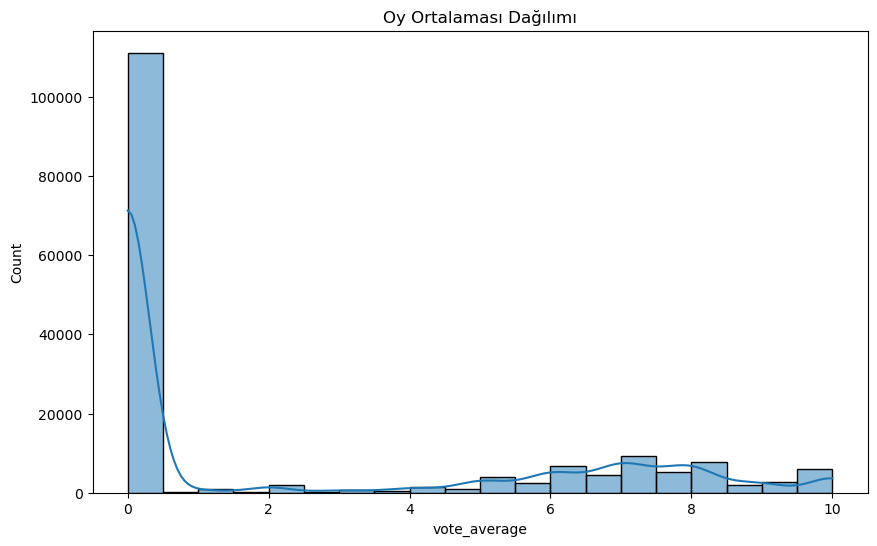

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DOSYA YOLUNU BURAYA YAPIŞTIRIYORUZ (Başına 'r' koyarak)
file_path = r"C:\Users\Arsla\Desktop\veriMadenciliği\TMDB_tv_dataset_v3.csv"

# 1. Veriyi Yükleme
try:
    df = pd.read_csv(file_path)
    print("✅ Dosya başarıyla yüklendi!")
    print(f"Veri Seti Boyutu: {df.shape}")
except FileNotFoundError:
    print("❌ Hata: Dosya hala bulunamıyor. Dosya adını veya klasörü kontrol et.")

# Yüklendiyse devam et...
if 'df' in locals():
    # 2. İlk 5 Satıra Bakış
    print("\n--- İlk 5 Satır ---")
    print(df.head())

    # 3. Eksik Veri Analizi
    print("\n--- Eksik Veri Oranları (%) ---")
    missing = df.isnull().mean() * 100
    print(missing[missing > 0].sort_values(ascending=False))

    # 4. Basit Bir Grafik (Test Amaçlı)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['vote_average'], bins=20, kde=True)
    plt.title('Oy Ortalaması Dağılımı')
    plt.show()

In [3]:
print("\n--- Sayısal Sütunların Temel İstatistikleri ---")
# .T ekleyerek tabloyu ters çeviriyoruz (Transpoze), böylece okuması daha kolay olur
print(df.describe().T)


--- Sayısal Sütunların Temel İstatistikleri ---
                       count           mean           std  min      25%  \
id                  168639.0  111307.074704  76451.662352  1.0  45936.5   
number_of_seasons   168639.0       1.548497      2.942872  0.0      1.0   
number_of_episodes  168639.0      24.465082    134.799622  0.0      1.0   
vote_count          168639.0      13.305054    190.809059  0.0      0.0   
vote_average        168639.0       2.333843      3.454334  0.0      0.0   
popularity          168639.0       5.882644     42.023216  0.0      0.6   
episode_run_time    168639.0      22.603348     47.950427  0.0      0.0   

                          50%          75%         max  
id                  97734.000  196923.5000  251213.000  
number_of_seasons       1.000       1.0000     240.000  
number_of_episodes      6.000      20.0000   20839.000  
vote_count              0.000       1.0000   21857.000  
vote_average            0.000       6.0000      10.000  
populari

In [5]:
# Çıkarılacak sütun listesi
columns_to_drop = [
    'id', 'name', 'original_name', 'backdrop_path', 
    'poster_path', 'homepage', 'tagline'
]

# Sütunları DataFrame'den çıkarma
df_temp = df.drop(columns=columns_to_drop, axis=1)

print(f"Sütun çıkarıldıktan sonra kalan sütun sayısı: {df_temp.shape[1]}")

Sütun çıkarıldıktan sonra kalan sütun sayısı: 22


In [7]:
# Hedef Değişken (y)
y = df_temp['popularity']

# Öznitelikler (X)
X = df_temp.drop('popularity', axis=1)

print("\nKalan Özniteliklerdeki Eksik Değer Kontrolü:")
print(X.isnull().sum().sort_values(ascending=False).head(10))


Kalan Özniteliklerdeki Eksik Değer Kontrolü:
created_by              132143
production_companies    109297
production_countries     91128
overview                 75306
networks                 71050
genres                   68926
spoken_languages         59359
languages                58589
first_air_date           31736
origin_country           31030
dtype: int64


In [9]:
# Kategorik (object) ve Boolean sütunları seçme
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Eksik değerleri 'Unknown' ile doldurma (Imputation)
X[categorical_cols] = X[categorical_cols].fillna('Unknown')

In [11]:
# 1. Eksik Tarihleri Doldurma (Çok Eski Bir Tarihle)
X['first_air_date'] = X['first_air_date'].fillna('1900-01-01')
X['last_air_date'] = X['last_air_date'].fillna('1900-01-01')

# 2. Tarih Tipine Dönüştürme
X['first_air_date'] = pd.to_datetime(X['first_air_date'], errors='coerce')
X['last_air_date'] = pd.to_datetime(X['last_air_date'], errors='coerce')

# 3. Yeni Öznitelik Mühendisliği

# Dizinin yaşı (Aktiflik Süresi) - (Yıllık olarak)
X['series_age'] = (pd.to_datetime('today') - X['first_air_date']).dt.days / 365.25

# Dizinin yayın süresi (ilk ve son tarih arasındaki fark)
X['active_duration_days'] = (X['last_air_date'] - X['first_air_date']).dt.days

# İlk ve son tarih sütunlarını çıkarıyoruz
X = X.drop(columns=['first_air_date', 'last_air_date'])

In [13]:
# Son eksik değer kontrolü (Sayısal sütunlar kalmış olsaydı)
# X['numerik_sutun'].fillna(X['numerik_sutun'].median(), inplace=True)

# Son durumda eksik değeri olan sütun kalmadığını varsayıyoruz.
print("\nFinal Eksik Değer Kontrolü (True: Eksik Değer Var):")
print(X.isnull().any().any())


Final Eksik Değer Kontrolü (True: Eksik Değer Var):
True


In [21]:
# 1. ADIM: X'i en baştan temiz haliyle tekrar oluştur (Reset atıyoruz)
# df_temp hafızada durduğu için onu kullanabiliriz.
X = df_temp.drop('popularity', axis=1)

# 2. ADIM: Sayısal eksikleri tekrar hızlıca doldur (Resetlediğimiz için gitti)
num_cols = X.select_dtypes(include=['number']).columns
for col in num_cols:
    X[col] = X[col].fillna(X[col].median())

# 3. ADIM: Şimdi DÜZELTİLMİŞ ayırma kodunu uyguluyoruz
def extract_first_item(text_str):
    # Boşsa veya Unknown ise geç
    if pd.isna(text_str) or text_str == 'Unknown':
        return 'Unknown'
    # Virgülle ayır, ilkini al (Örn: "Drama, Crime" -> "Drama")
    return str(text_str).split(',')[0].strip()

cols_to_process = ['genres', 'languages', 'networks', 'origin_country', 'production_countries']

for col in cols_to_process:
    if col in X.columns:
        # Yeni sütunu oluştur (main_genres vs.)
        X[f'main_{col}'] = X[col].apply(extract_first_item)
        # Eskisini sil
        X = X.drop(columns=[col])

# 4. SONUÇ
print("\nVeriler Başarıyla Ayrıştırıldı!")
print("Yeni Sütunların İlk 5 Satırı:")
new_cols = [f'main_{c}' for c in cols_to_process]
print(X[new_cols].head())


Veriler Başarıyla Ayrıştırıldı!
Yeni Sütunların İlk 5 Satırı:
          main_genres main_languages main_networks main_origin_country  \
0    Sci-Fi & Fantasy             en           HBO                  US   
1               Crime             es       Netflix                  ES   
2               Drama             en       Netflix                  US   
3  Action & Adventure             en           AMC                  US   
4               Crime             en           FOX                  US   

  main_production_countries  
0            United Kingdom  
1                     Spain  
2  United States of America  
3  United States of America  
4  United States of America  


In [26]:
# HIZLANDIRILMIŞ VERSİYON
import pandas as pd
import numpy as np

# İşlenecek sütunları tekrar seçelim
categorical_cols_to_encode = X.select_dtypes(include=['object']).columns
THRESHOLD = 0.01  # %1 eşiği

print("--- Nadir Kategorileri 'Other' Olarak İşleme Başladı ---")

for col in categorical_cols_to_encode:
    # 1. Frekansları hesapla
    value_counts = X[col].value_counts(normalize=True)
    
    # 2. STRATEJİ DEĞİŞİKLİĞİ: Nadirleri değil, POPÜLER olanları (Kalanları) buluyoruz
    # Çünkü popüler olanların listesi çok daha kısadır, kontrolü kolaydır.
    keep_categories = value_counts[value_counts >= THRESHOLD].index
    
    # 3. HIZLI İŞLEM (Vectorization): 
    # "Eğer değer 'keep_categories' içinde YOKSA (~), onu 'Other' yap"
    # .loc kullanmak .replace kullanmaktan 100 kat daha hızlıdır.
    X.loc[~X[col].isin(keep_categories), col] = 'Other'
    
    print(f"✅ '{col}' tamamlandı. Kalan kategori sayısı: {X[col].nunique()}")

print("\nTüm işlemler bitti!")

--- Nadir Kategorileri 'Other' Olarak İşleme Başladı ---
✅ 'original_language' tamamlandı. Kalan kategori sayısı: 17
✅ 'overview' tamamlandı. Kalan kategori sayısı: 1
✅ 'first_air_date' tamamlandı. Kalan kategori sayısı: 1
✅ 'last_air_date' tamamlandı. Kalan kategori sayısı: 1
✅ 'type' tamamlandı. Kalan kategori sayısı: 6
✅ 'status' tamamlandı. Kalan kategori sayısı: 5
✅ 'created_by' tamamlandı. Kalan kategori sayısı: 1
✅ 'spoken_languages' tamamlandı. Kalan kategori sayısı: 19
✅ 'production_companies' tamamlandı. Kalan kategori sayısı: 2
✅ 'main_genres' tamamlandı. Kalan kategori sayısı: 13
✅ 'main_languages' tamamlandı. Kalan kategori sayısı: 14
✅ 'main_networks' tamamlandı. Kalan kategori sayısı: 6
✅ 'main_origin_country' tamamlandı. Kalan kategori sayısı: 20
✅ 'main_production_countries' tamamlandı. Kalan kategori sayısı: 13

Tüm işlemler bitti!


In [28]:
# Tüm Object sütunlarını seçme (düşük frekanslılar gruplandıktan sonra)
object_cols = X.select_dtypes(include=['object']).columns

# One-Hot Encoding uygulaması
# 'dummy_na=False' ile eksik değerler (NaN) için ekstra bir sütun oluşturulmaz (zaten hepsini doldurmuştuk)
X = pd.get_dummies(X, columns=object_cols, dummy_na=False)

print(f"\nOne-Hot Encoding sonrası toplam öznitelik sayısı: {X.shape[1]}")
print(f"Encoded sütunların ilk 5'i: {X.columns[:5].tolist()}")


One-Hot Encoding sonrası toplam öznitelik sayısı: 126
Encoded sütunların ilk 5'i: ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'adult']


In [30]:
from sklearn.model_selection import train_test_split

# Veriyi %80 Eğitim, %20 Test olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Eğitim Seti Boyutu: (134911, 126)
Test Seti Boyutu: (33728, 126)


In [32]:
from sklearn.feature_selection import VarianceThreshold

# Eşik Değeri (Threshold): 0.1 (Varyansı 0.1'den düşük olanları at)
# Genelde 0 verilir (sabitleri atar), ama biraz daha agresif elemek için 0.01 veya 0.1 seçilebilir.
vt_selector = VarianceThreshold(threshold=0.1)

# Selector'ı sadece eğitim setine göre (fit) ayarlıyoruz
vt_selector.fit(X_train)

# Seçilen sütunların isimlerini alalım
cols_kept_vt = X_train.columns[vt_selector.get_support()]

# Dönüşümü uygulayalım
X_train_vt = pd.DataFrame(vt_selector.transform(X_train), columns=cols_kept_vt, index=X_train.index)
X_test_vt = pd.DataFrame(vt_selector.transform(X_test), columns=cols_kept_vt, index=X_test.index)

print(f"Variance Threshold Öncesi Özellik Sayısı: {X_train.shape[1]}")
print(f"Variance Threshold Sonrası Özellik Sayısı: {X_train_vt.shape[1]}")
print("Atılan Özellikler:", set(X_train.columns) - set(cols_kept_vt))

Variance Threshold Öncesi Özellik Sayısı: 126
Variance Threshold Sonrası Özellik Sayısı: 24
Atılan Özellikler: {'main_languages_pt', 'main_languages_ja', 'original_language_ja', 'original_language_de', 'original_language_nl', 'main_genres_Crime', 'main_genres_Animation', 'main_genres_Action & Adventure', 'main_origin_country_CA', 'main_languages_nl', 'last_air_date_Other', 'spoken_languages_Nederlands', 'spoken_languages_广州话 / 廣州話', 'main_production_countries_France', 'main_production_countries_Canada', 'main_origin_country_GB', 'original_language_th', 'spoken_languages_ภาษาไทย', 'main_genres_Family', 'main_production_countries_Japan', 'production_companies_Other', 'original_language_ar', 'production_companies_TVB', 'main_origin_country_DE', 'created_by_Other', 'main_origin_country_AU', 'main_languages_th', 'original_language_es', 'main_production_countries_Hong Kong', 'main_production_countries_India', 'original_language_pt', 'main_origin_country_FR', 'main_origin_country_NL', 'main_l

In [34]:
import pandas as pd

# ---  Raporlama Kodu ---

# 1. Sayısal Özet Tablosu Oluşturalım
ozet_tablosu = pd.DataFrame({
    'Analiz Durumu': ['Başlangıçtaki Özellik Sayısı', 'Temizlik Sonrası Kalan', 'Atılan (Gereksiz) Özellikler'],
    'Adet': [X_train.shape[1], X_train_vt.shape[1], X_train.shape[1] - X_train_vt.shape[1]]
})

print("📊 1. ADIM: VARYANS ANALİZ RAPORU")
print("-" * 40)
print(ozet_tablosu.to_string(index=False)) # İndex numaralarını gizleyerek temiz basar
print("-" * 40)

# 2. Atılanları değil, ELİMİZDE KALANLARI (Değerlileri) görelim
print("\n✅ MODEL İÇİN SEÇİLEN DEĞERLİ ÖZELLİKLER:")
kalanlar = X_train_vt.columns.tolist()

# Listeyi yan yana virgülle yazdıralım, alt alta uzun olmasın
print(", ".join(kalanlar))

print("\n🗑️  NOT: Atılan 100+ özellik, verinin %99'unda aynı olan (sabit) gereksiz detaylardı.")

📊 1. ADIM: VARYANS ANALİZ RAPORU
----------------------------------------
               Analiz Durumu  Adet
Başlangıçtaki Özellik Sayısı   126
      Temizlik Sonrası Kalan    24
Atılan (Gereksiz) Özellikler   102
----------------------------------------

✅ MODEL İÇİN SEÇİLEN DEĞERLİ ÖZELLİKLER:
number_of_seasons, number_of_episodes, vote_count, vote_average, in_production, episode_run_time, original_language_en, type_Scripted, status_Ended, status_Returning Series, spoken_languages_English, spoken_languages_Other, main_genres_Documentary, main_genres_Drama, main_genres_Unknown, main_languages_Unknown, main_languages_en, main_networks_Other, main_networks_Unknown, main_origin_country_Other, main_origin_country_US, main_origin_country_Unknown, main_production_countries_Other, main_production_countries_Unknown

🗑️  NOT: Atılan 100+ özellik, verinin %99'unda aynı olan (sabit) gereksiz detaylardı.


In [26]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def model_degerlendir(model, X_train, y_train, X_test, y_test, model_adi):
    """
    Modeli eğitir ve ikili sınıflandırma metriklerini yazdırır.
    
    Not: Bu fonksiyon, y değişkenini (popularity) medyan değere göre ikili sınıfa dönüştürür.
    """
    print(f"\n==============================================")
    print(f"       ➡️  {model_adi} MODELİ SONUÇLARI")
    print(f"==============================================")
    
    # y (popularity) regresyon değişkenini ikili sınıfa dönüştürme (Popülerlik Medyanına göre)
    y_median = y_train.median()
    y_train_class = (y_train > y_median).astype(int)
    y_test_class = (y_test > y_median).astype(int)
    
    model.fit(X_train, y_train_class)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"   📈 ROC AUC Skoru: {roc_auc_score(y_test_class, y_proba):.4f}")
    print(f"   🎯 Doğruluk (Accuracy) Skoru: {accuracy_score(y_test_class, y_pred):.4f}")
    
    cm = confusion_matrix(y_test_class, y_pred)
    print("\n   📊 Karışıklık Matrisi (Confusion Matrix):")
    cm_df = pd.DataFrame(
        cm, 
        index=["Gerçek Popüler Değil (0)", "Gerçek Popüler (1)"], 
        columns=["Tahmin Popüler Değil (0)", "Tahmin Popüler (1)"]
    )
    print(cm_df.to_string())

    print("\n   📜 Sınıflandırma Raporu:")
    print(classification_report(y_test_class, y_pred))

print("✅ Model Değerlendirme Fonksiyonu tanımlandı.")

✅ Model Değerlendirme Fonksiyonu tanımlandı.


In [28]:
# Modeli Başlatma
nb_model = GaussianNB()

# Modeli Eğitme ve Değerlendirme (y'yi sınıflara ayırma işlemi fonksiyon içinde yapılır)
model_degerlendir(
    nb_model, X_train_vt, y_train, X_test_vt, y_test, "GAUSSIAN NAIVE BAYES"
)

print("\n--- Naive Bayes analizi tamamlandı. ---")


       ➡️  GAUSSIAN NAIVE BAYES MODELİ SONUÇLARI
   📈 ROC AUC Skoru: 0.8666
   🎯 Doğruluk (Accuracy) Skoru: 0.7254

   📊 Karışıklık Matrisi (Confusion Matrix):
                          Tahmin Popüler Değil (0)  Tahmin Popüler (1)
Gerçek Popüler Değil (0)                     16011                 836
Gerçek Popüler (1)                            8427                8454

   📜 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     16847
           1       0.91      0.50      0.65     16881

    accuracy                           0.73     33728
   macro avg       0.78      0.73      0.71     33728
weighted avg       0.78      0.73      0.71     33728


--- Naive Bayes analizi tamamlandı. ---


In [30]:
# Modeli Başlatma
lr_model = LogisticRegression(
    solver="liblinear", random_state=42, max_iter=1000
)

# Modeli Eğitme ve Değerlendirme
model_degerlendir(
    lr_model, X_train_vt, y_train, X_test_vt, y_test, "LOJİSTİK REGRESYON"
)

print("\n--- Lojistik Regresyon analizi tamamlandı. ---")


       ➡️  LOJİSTİK REGRESYON MODELİ SONUÇLARI
   📈 ROC AUC Skoru: 0.8871
   🎯 Doğruluk (Accuracy) Skoru: 0.7982

   📊 Karışıklık Matrisi (Confusion Matrix):
                          Tahmin Popüler Değil (0)  Tahmin Popüler (1)
Gerçek Popüler Değil (0)                     13709                3138
Gerçek Popüler (1)                            3667               13214

   📜 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     16847
           1       0.81      0.78      0.80     16881

    accuracy                           0.80     33728
   macro avg       0.80      0.80      0.80     33728
weighted avg       0.80      0.80      0.80     33728


--- Lojistik Regresyon analizi tamamlandı. ---


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stilini ayarlayalım (isteğe bağlı)
sns.set_style("whitegrid")

In [34]:
# Raporunuzdaki nihai sonuçları girelim
data = {
    'Model': ['Gaussian Naive Bayes', 'Lojistik Regresyon'],
    'ROC AUC Skoru': [0.8666, 0.8871], # Naive Bayes [cite: 97], Lojistik Regresyon [cite: 127]
    'Doğruluk (Accuracy)': [0.7254, 0.7982] # Naive Bayes [cite: 98], Lojistik Regresyon [cite: 128]
}

model_sonuclari = pd.DataFrame(data)

C:\Users\Arsla\AppData\Local\Temp\ipykernel_21812\1628531738.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Model', y='ROC AUC Skoru', data=model_sonuclari, palette='viridis')
C:\Users\Arsla\AppData\Local\Temp\ipykernel_21812\1628531738.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Model', y='Doğruluk (Accuracy)', data=model_sonuclari, palette='mako')


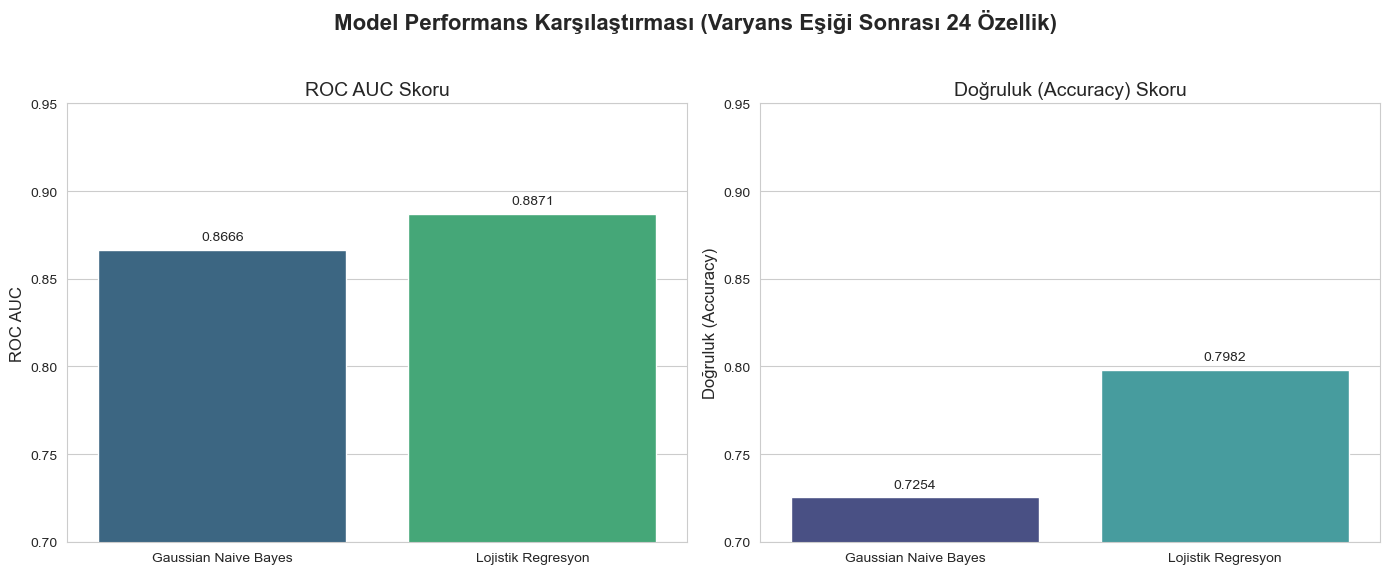


✅ Grafik, Lojistik Regresyon'un hem ROC AUC (0.8871) hem de Doğruluk (0.7982) skorlarında Gaussian Naive Bayes'e göre daha üstün olduğunu açıkça göstermektedir.


In [36]:
# --- Grafik Oluşturma ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Model Performans Karşılaştırması (Varyans Eşiği Sonrası 24 Özellik)', fontsize=16, fontweight='bold')

# --- 1. Grafik: ROC AUC Skoru ---
sns.barplot(ax=axes[0], x='Model', y='ROC AUC Skoru', data=model_sonuclari, palette='viridis')
axes[0].set_title('ROC AUC Skoru', fontsize=14)
axes[0].set_ylim(0.7, 0.95) # Grafiği daha anlamlı hale getirmek için y eksenini sınırla
axes[0].set_ylabel('ROC AUC', fontsize=12)
axes[0].set_xlabel('')

# Her çubuğun üzerine değeri yazdıralım
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.4f}", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# --- 2. Grafik: Doğruluk (Accuracy) Skoru ---
sns.barplot(ax=axes[1], x='Model', y='Doğruluk (Accuracy)', data=model_sonuclari, palette='mako')
axes[1].set_title('Doğruluk (Accuracy) Skoru', fontsize=14)
axes[1].set_ylim(0.7, 0.95) # Grafiği daha anlamlı hale getirmek için y eksenini sınırla
axes[1].set_ylabel('Doğruluk (Accuracy)', fontsize=12)
axes[1].set_xlabel('')

# Her çubuğun üzerine değeri yazdıralım
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.4f}", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Suptitle için boşluk bırak
plt.show()

# --- Grafik Rapor Yorumu ---
print("\n✅ Grafik, Lojistik Regresyon'un hem ROC AUC (0.8871) hem de Doğruluk (0.7982) skorlarında Gaussian Naive Bayes'e göre daha üstün olduğunu açıkça göstermektedir.")